In [1]:
%matplotlib inline
import sys
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

# 운영체제별로 기본 폰트가 다릅니다.
if "darwin" in sys.platform:
    plt.rcParams['font.family'] = 'AppleGothic'  # 맥 기본 폰트
elif "win" in sys.platform:
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 폰트
else:
    print(f"{sys.platform}은 폰트 직접 지정이 필요합니다.")  # 윈도우/맥 외에 리눅스 등의 플랫폼
    sys.exit(1)

from tqdm import tqdm   # pip install tqdm
from libs import stock_daum, stock_naver

In [2]:
# https://matplotlib.org/gallery/ticks_and_spines/tick-formatters.html
from matplotlib.ticker import FuncFormatter

## 코스피 종목코드 수집

+ 코스피 종목코드 : https://gist.github.com/allieus/733725662c644ab56c9db9d3cdf77ed1

In [3]:
# 코스피 지수 CSV를 읽어들입니다.
kospi_df = pd.read_csv("https://bit.ly/3g5YKXT", index_col='종목명', dtype={'종목코드': str})
print(kospi_df.shape)
kospi_df.head()

(768, 1)


,종목코드
종목명,
미원에스씨,268280
경동도시가스,267290
넷마블게임즈,251270
아이엔지생명,079440
현대건설기계,267270


In [4]:
kospi_series = kospi_df['종목코드']

## 3개 종목의 일별 거래량 크롤링

In [5]:
code = kospi_series['삼성전자']
list(stock_naver.get_종목별_일별_거래량(code, max_page=5))

[                 종가     전일비   등락률         거래량  기관 - 순매매량  외국인 - 순매매량  \
 2024-10-02  61300.0  -200.0 -0.33  28473536.0 -2523471.0  -1843104.0   
 2024-09-30  61500.0 -2700.0 -4.21  32694163.0 -2310470.0 -11128815.0   
 2024-09-27  64200.0  -500.0 -0.77  28433030.0 -1106122.0  -1614477.0   
 2024-09-26  64700.0  2500.0  4.02  37566015.0  4782001.0  -3691758.0   
 2024-09-25  62200.0 -1000.0 -1.58  28652438.0  3172763.0  -8778785.0   
 2024-09-24  63200.0   600.0  0.96  26957500.0  2828093.0  -7593177.0   
 2024-09-23  62600.0  -400.0 -0.63  28542376.0  1860477.0 -10118706.0   
 2024-09-20  63000.0  -100.0 -0.16  32746056.0  1239652.0  -6354749.0   
 2024-09-19  63100.0 -1300.0 -2.02  49402713.0  5359556.0 -14624539.0   
 2024-09-13  64400.0 -1900.0 -2.87  25045135.0   492192.0 -12146351.0   
 2024-09-12  66300.0  1400.0  2.16  35884106.0   893581.0  -5241082.0   
 2024-09-11  64900.0 -1300.0 -1.96  35809707.0  -608807.0 -13956188.0   
 2024-09-10  66200.0 -1300.0 -1.93  30651376.0 -128

In [6]:
code = kospi_series['삼성전자']
삼성전자_volume_df = pd.concat(stock_naver.get_종목별_일별_거래량(code, max_page=5))

code = kospi_series['LG전자']
LG전자_volume_df = pd.concat(stock_naver.get_종목별_일별_거래량(code, max_page=5))

code = kospi_series['SK하이닉스']
SK하이닉스_volume_df = pd.concat(stock_naver.get_종목별_일별_거래량(code, max_page=5))

In [7]:
df = pd.DataFrame({
    '삼성전자': 삼성전자_volume_df['종가'],
    'LG전자': LG전자_volume_df['종가'],
    'SK하이닉스': SK하이닉스_volume_df['종가'],
})
print(df.shape)
df.head()

(90, 3)


,삼성전자,LG전자,SK하이닉스
2024-10-02,61300.0,103000.0,169100.0
2024-09-30,61500.0,104300.0,174600.0
2024-09-27,64200.0,106500.0,183800.0
2024-09-26,64700.0,107900.0,180900.0
2024-09-25,62200.0,105600.0,165300.0


## 시각화

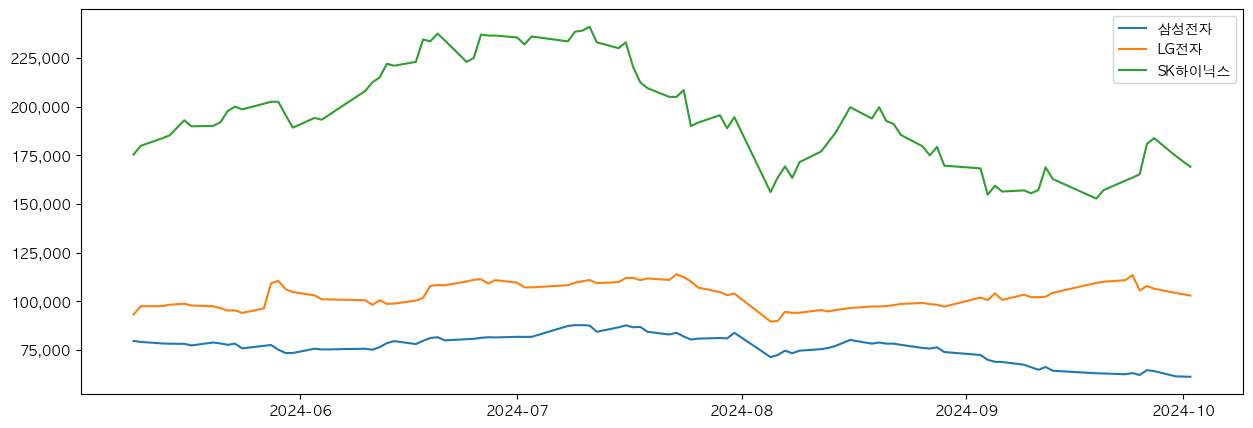

In [8]:
ax = df.plot(figsize=(15, 5))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: '{:,}'.format(int(y))))